# Loan Outcome Prediction at the Time of Application

## Import Packages

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Load Data

In [73]:
train_flag = pd.read_csv('data/train/train_flag.csv')
train_flag.sample(5)

,uid,NAME_CONTRACT_TYPE,TARGET
182387,QAP95908515,Cash loans,0
165629,NJM18704885,Cash loans,0
231592,QIV59110949,Cash loans,1
124068,UQN44806404,Cash loans,0
187158,LXM09802787,Cash loans,0


In [71]:
accounts_data = pd.read_json('data/train/accounts_data_train.json', typ='series', orient='records')
accounts_data[0]

[{'credit_type': 'Consumer credit',
  'loan_amount': 272745.0,
  'amount_overdue': 0.0,
  'open_date': '2018-09-22',
  'closed_date': '2020-02-22',
  'payment_hist_string': '000000000000000000000010000000000000000000000000000',
  'uid': 'AAA09044550'},
 {'credit_type': 'Consumer credit',
  'loan_amount': 4500.0,
  'amount_overdue': 0.0,
  'open_date': '2018-03-08',
  'closed_date': '2019-07-25',
  'payment_hist_string': '000000000000000014044000000000000000000000000000',
  'uid': 'AAA09044550'}]

In [62]:
train_flag[train_flag['uid'] == 'AAA09044550']

,uid,NAME_CONTRACT_TYPE,TARGET
70453,AAA09044550,Cash loans,0


In [66]:
enquiry_data = pd.read_json('data/train/enquiry_data_train.json', typ='series')
enquiry_data[0]

[{'enquiry_type': 'Interbank credit',
  'enquiry_amt': 168839,
  'enquiry_date': '2020-11-08',
  'uid': 'AAA08065248'},
 {'enquiry_type': 'Mobile operator loan',
  'enquiry_amt': 268392,
  'enquiry_date': '2020-09-20',
  'uid': 'AAA08065248'},
 {'enquiry_type': 'Mobile operator loan',
  'enquiry_amt': 36082,
  'enquiry_date': '2020-06-19',
  'uid': 'AAA08065248'},
 {'enquiry_type': 'Interbank credit',
  'enquiry_amt': 180467,
  'enquiry_date': '2019-10-22',
  'uid': 'AAA08065248'},
 {'enquiry_type': 'Cash loan (non-earmarked)',
  'enquiry_amt': 227459,
  'enquiry_date': '2020-05-24',
  'uid': 'AAA08065248'},
 {'enquiry_type': 'Mortgage',
  'enquiry_amt': 44841,
  'enquiry_date': '2019-11-03',
  'uid': 'AAA08065248'},
 {'enquiry_type': 'Revolving loans',
  'enquiry_amt': 364751,
  'enquiry_date': '2020-02-26',
  'uid': 'AAA08065248'},
 {'enquiry_type': 'Interbank credit',
  'enquiry_amt': 127618,
  'enquiry_date': '2020-10-04',
  'uid': 'AAA08065248'},
 {'enquiry_type': 'Loan for purcha

In [63]:
train_flag[train_flag['uid'] == 'AAA08065248']

,uid,NAME_CONTRACT_TYPE,TARGET
160539,AAA08065248,Revolving loans,0


## Distributions of Variables

Text(0.5, 1.0, '0: Good Loan, 1: Bad Loan')

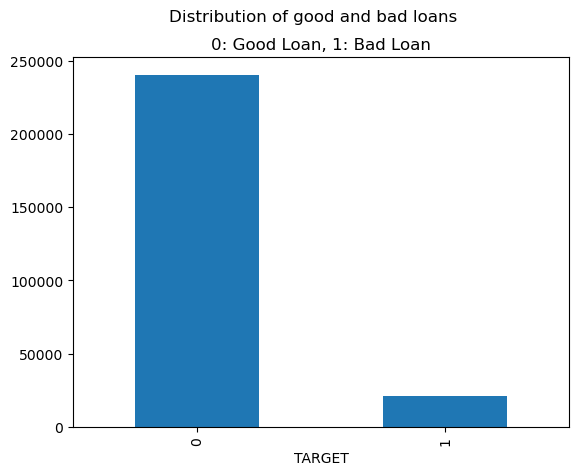

In [38]:
train_flag['TARGET'].value_counts().plot.bar()
plt.suptitle('Distribution of good and bad loans')
plt.title('0: Good Loan, 1: Bad Loan')

###### Observation: This problem should be modeled as anomaly detection, because 'bad loans' are a very small in comparison to 'good loans'.

In [54]:
temp = train_flag[train_flag['NAME_CONTRACT_TYPE'] == 'Cash loans']['TARGET'].value_counts()
temp / temp.sum()

TARGET
0    0.916706
1    0.083294
Name: count, dtype: float64

In [55]:
temp = train_flag[train_flag['NAME_CONTRACT_TYPE'] == 'Revolving loans']['TARGET'].value_counts()
temp / temp.sum()

TARGET
0    0.945452
1    0.054548
Name: count, dtype: float64

###### Observation: Cash loans are slightly more likely to lead to default.

In [39]:
train_flag['uid'].value_counts()

uid
XDA69787158    1
ENW19346405    1
MCF31013084    1
RAY47864530    1
HWG31395190    1
              ..
QWV47907209    1
MIC96598838    1
AGZ51661177    1
PTJ85314747    1
AUB40959272    1
Name: count, Length: 261383, dtype: int64

###### Observation: There's data for only one loan per applicant.

<Axes: xlabel='NAME_CONTRACT_TYPE'>

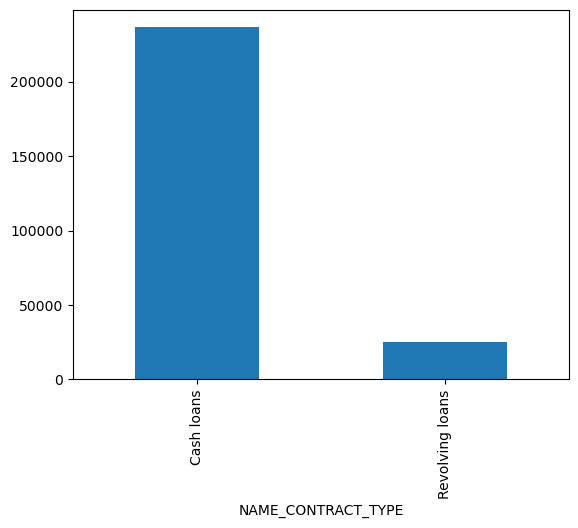

In [61]:
train_flag['NAME_CONTRACT_TYPE'].value_counts().plot.bar()

###### Observation: Cash loans are much more in number as compared to revolving loans.